In [2]:
import numpy as np 
import pandas as pd 
import seaborn as sns 
import matplotlib.pyplot as plt 
%matplotlib inline 
import warnings 
warnings.filterwarnings('ignore')

In [3]:
df = pd.read_csv('data/stud.csv')

In [4]:
df.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [5]:
df.shape

(1000, 8)

In [6]:
df.isna().sum()


gender                         0
race_ethnicity                 0
parental_level_of_education    0
lunch                          0
test_preparation_course        0
math_score                     0
reading_score                  0
writing_score                  0
dtype: int64

In [7]:
df.duplicated().sum()


0

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race_ethnicity               1000 non-null   object
 2   parental_level_of_education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test_preparation_course      1000 non-null   object
 5   math_score                   1000 non-null   int64 
 6   reading_score                1000 non-null   int64 
 7   writing_score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


In [9]:
df.nunique()

gender                          2
race_ethnicity                  5
parental_level_of_education     6
lunch                           2
test_preparation_course         2
math_score                     81
reading_score                  72
writing_score                  77
dtype: int64

In [10]:
df.describe()


,math_score,reading_score,writing_score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


In [11]:
df.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [13]:
print(df['gender'].unique())
print(df['race_ethnicity'].unique())
print(df['parental_level_of_education'].unique())
print(df['lunch'].unique())
print(df['test_preparation_course'].unique())



['female' 'male']
['group B' 'group C' 'group A' 'group D' 'group E']
["bachelor's degree" 'some college' "master's degree" "associate's degree"
 'high school' 'some high school']
['standard' 'free/reduced']
['none' 'completed']


In [14]:
numeric_features = [features for features in df.columns if df[features].dtype != 'O']
categorical_features = [features for features in df.columns if df[features].dtype == 'O']

print('we have {} numeric features'.format(len(numeric_features)))
print('we have {} categorical features'.format(len(categorical_features)))
print(categorical_features)




we have 3 numeric features
we have 5 categorical features
['gender', 'race_ethnicity', 'parental_level_of_education', 'lunch', 'test_preparation_course']


In [15]:
df['Total_score'] = df['math_score'] + df['reading_score'] + df['writing_score']
df['Average_score'] = df['Total_score'] / 3

df.head()





,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score,Total_score,Average_score
0,female,group B,bachelor's degree,standard,none,72,72,74,218,72.666667
1,female,group C,some college,standard,completed,69,90,88,247,82.333333
2,female,group B,master's degree,standard,none,90,95,93,278,92.666667
3,male,group A,associate's degree,free/reduced,none,47,57,44,148,49.333333
4,male,group C,some college,standard,none,76,78,75,229,76.333333


In [17]:
reading_full = df[df['reading_score'] == 100]['Average_score'].count()
math_full = df[df['math_score'] == 100]['Average_score'].count()
writing_full = df[df['writing_score'] == 100]['Average_score'].count()

print(reading_full)
print(math_full)
print(writing_full)






17
7
14


In [18]:
reading_less_20 = df[df['reading_score'] <20]['Average_score'].count()
math_less_20 = df[df['math_score'] <20]['Average_score'].count()
writing_less_20 = df[df['writing_score'] <20]['Average_score'].count()

print(reading_less_20)
print(math_less_20)
print(writing_less_20)


1
4
3


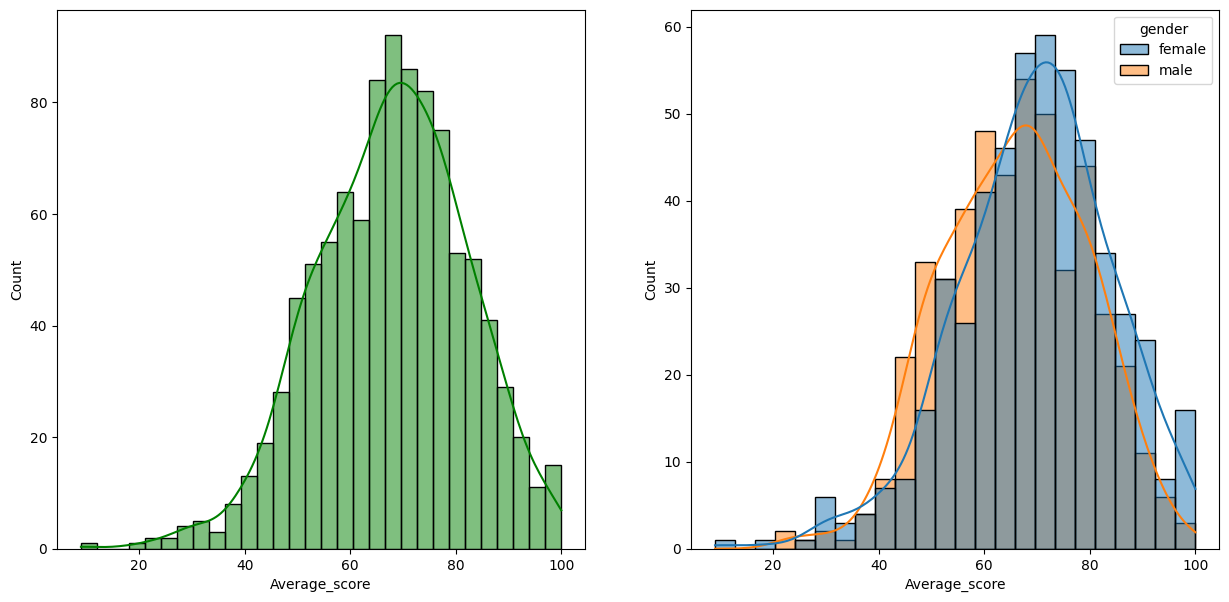

In [21]:
fig, axs = plt.subplots(1,2, figsize=(15,7))
plt.subplot(121)
sns.histplot(data=df,x='Average_score',bins=30,kde=True,color='g')

plt.subplot(122)
sns.histplot(data=df,x='Average_score',kde = True,hue='gender')
plt.show()


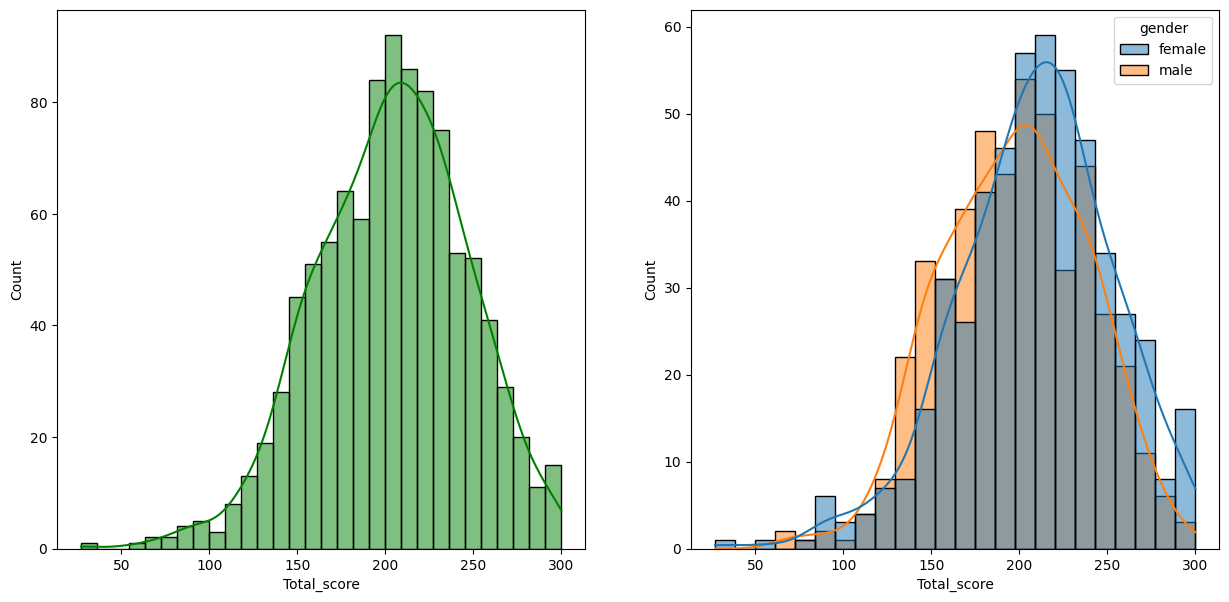

In [22]:
fig, axs = plt.subplots(1, 2, figsize=(15, 7))
plt.subplot(121)
sns.histplot(data=df,x='Total_score',bins=30,kde=True,color='g')
plt.subplot(122)
sns.histplot(data=df,x='Total_score',kde=True,hue='gender')
plt.show()

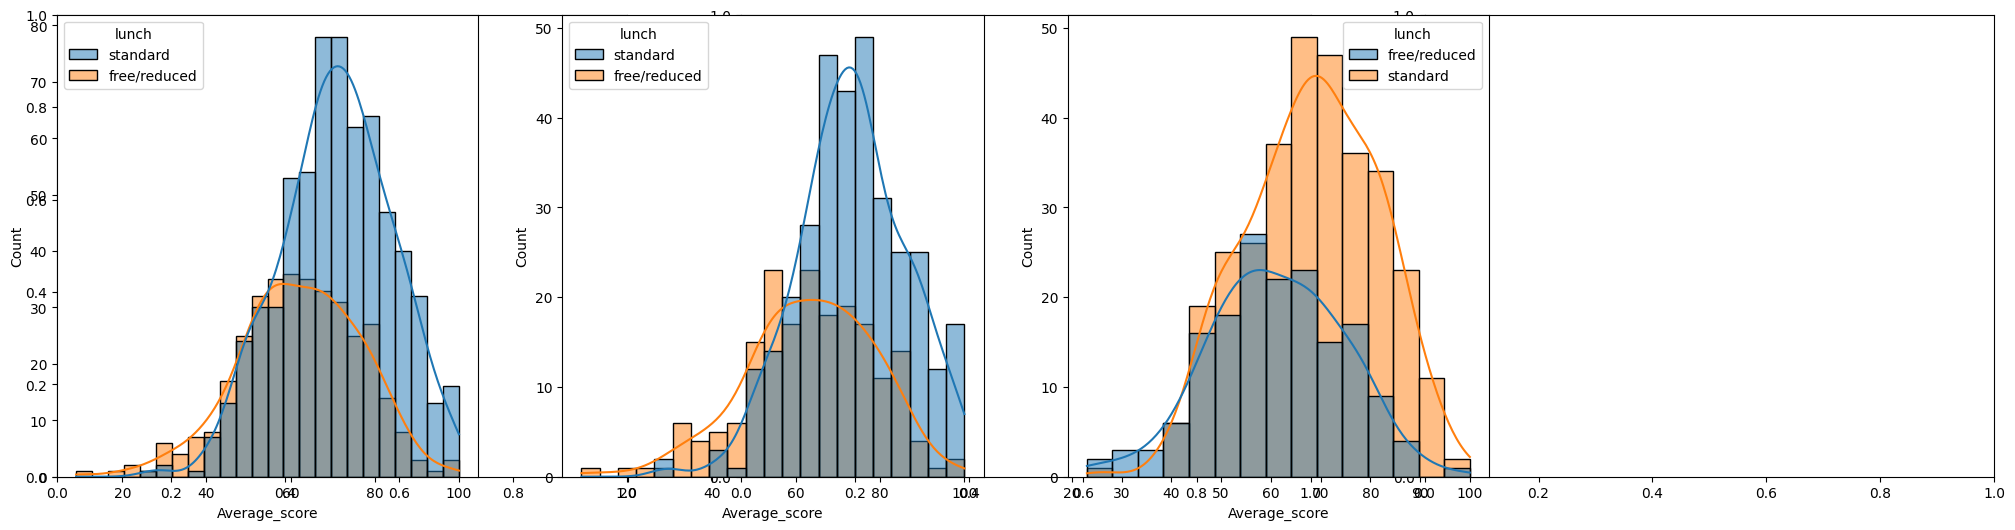

In [25]:
plt.subplots(1,3,figsize=(25,6))
plt.subplot(141)
sns.histplot(data=df,x='Average_score',kde=True,hue='lunch')
plt.subplot(142)
sns.histplot(data=df[df.gender=='female'],x='Average_score',kde=True,hue='lunch')
plt.subplot(143)
sns.histplot(data=df[df.gender=='male'],x='Average_score',kde=True,hue='lunch')
plt.show()

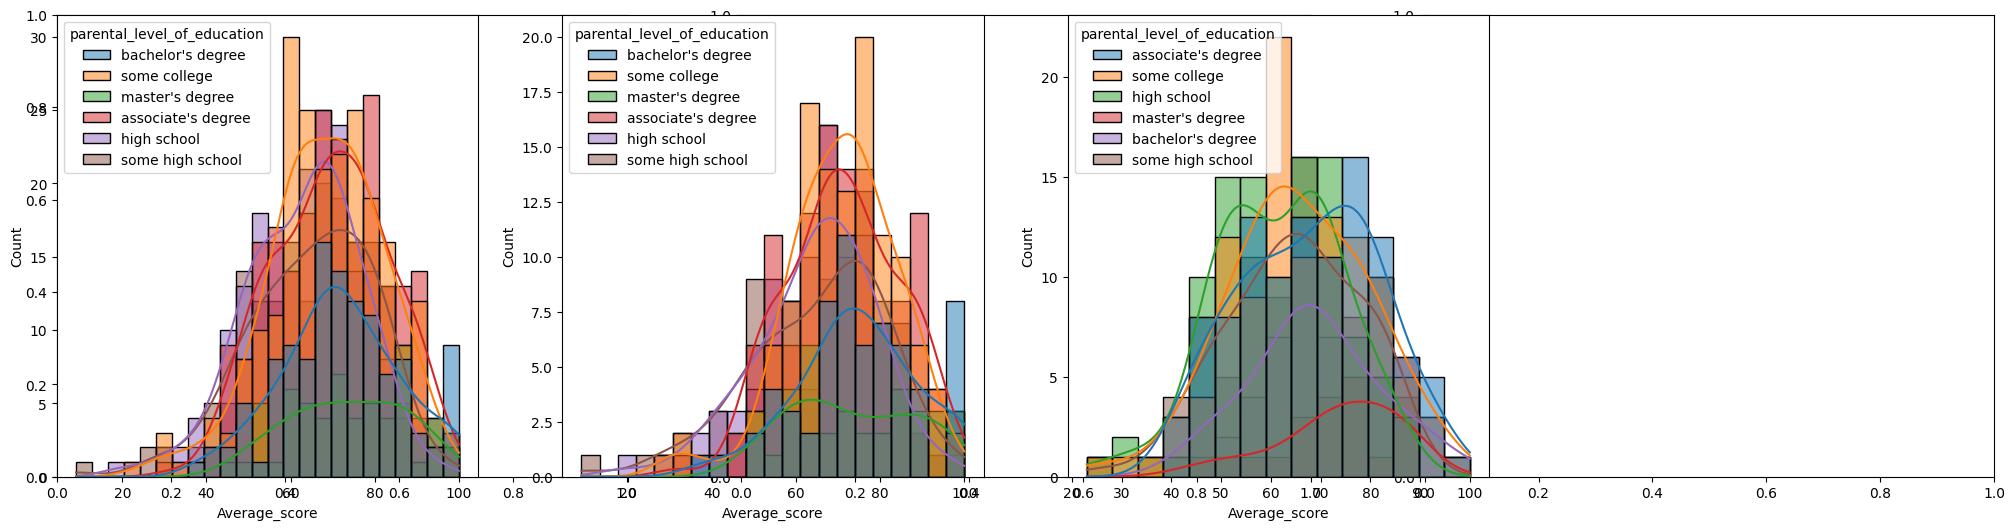

In [27]:
plt.subplots(1,3,figsize=(25,6))
plt.subplot(141)
ax = sns.histplot(data = df,x='Average_score',kde=True,hue = 'parental_level_of_education')
plt.subplot(142)
ax = sns.histplot(data = df[df.gender == 'female'],x='Average_score',kde=True,hue = 'parental_level_of_education')
plt.subplot(143)
ax = sns.histplot(data = df[df.gender == 'male'],x='Average_score',kde=True,hue = 'parental_level_of_education')
plt.show()



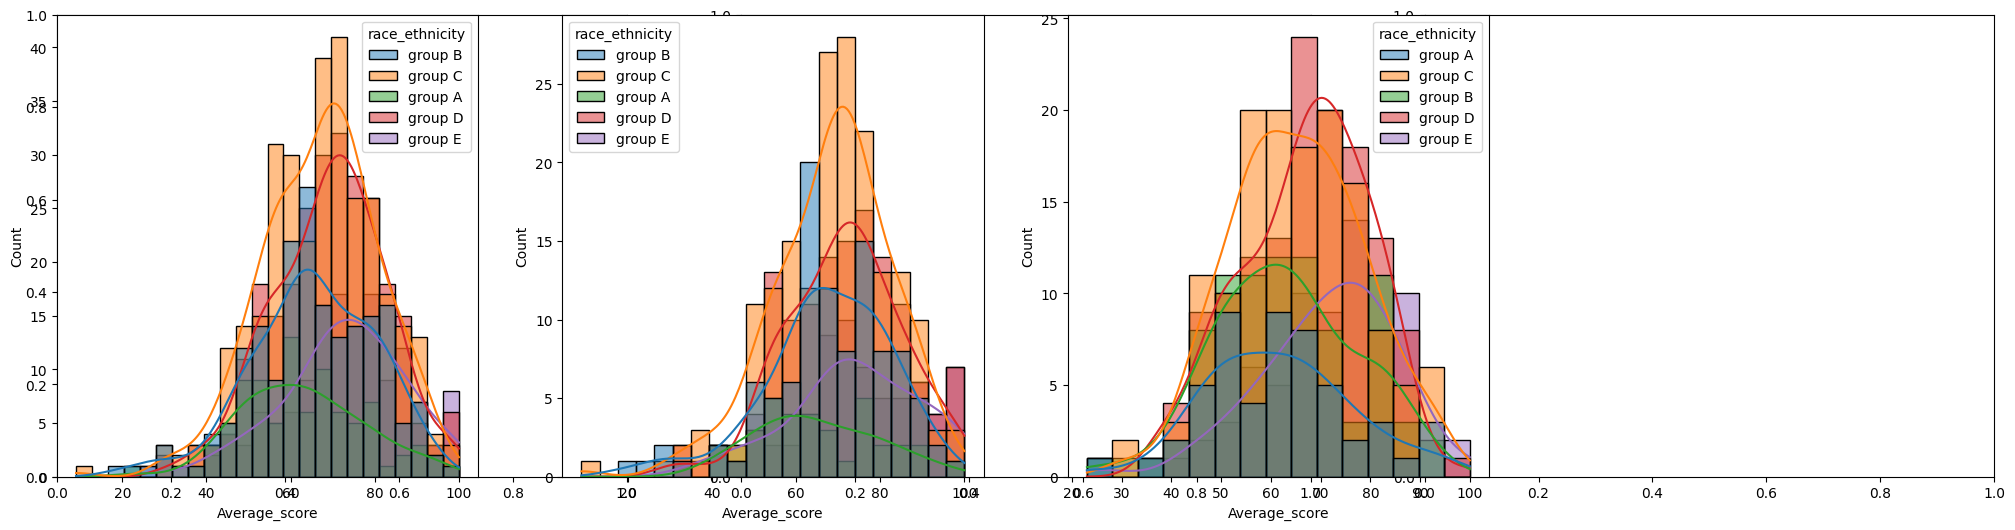

In [29]:
plt.subplots(1,3,figsize=(25,6))
plt.subplot(141)
ax =sns.histplot(data=df,x='Average_score',kde=True,hue='race_ethnicity')
plt.subplot(142)
ax =sns.histplot(data=df[df.gender=='female'],x='Average_score',kde=True,hue='race_ethnicity')
plt.subplot(143)
ax =sns.histplot(data=df[df.gender=='male'],x='Average_score',kde=True,hue='race_ethnicity')
plt.show()